<a href="https://colab.research.google.com/github/madsmpedersen/mmpe/blob/master/PyWake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

Cloning into 'PyWake'...
remote: Enumerating objects: 382, done.
remote: Counting objects: 100% (382/382), done.
remote: Compressing objects: 100% (239/239), done.
remote: Total 382 (delta 182), reused 293 (delta 131)
Receiving objects: 100% (382/382), 4.34 MiB | 3.24 MiB/s, done.
Resolving deltas: 100% (182/182), done.


# PyWake

- At Gitlab: https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake
- AEP calculator
  - Site and wind resource model
  - Wind turbine model
  - Wake models


In [0]:
%cd /content/PyWake
!pip install -e .

/content/PyWake
Obtaining file:///content/PyWake
    100% |████████████████████████████████| 6.4MB 4.6MB/s 
    100% |████████████████████████████████| 215kB 28.3MB/s 
datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 4.5.2 which is incompatible.
coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 4.5.2 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
  Running setup.py develop for py-wake


AEP [GWh] 9.097729056246472


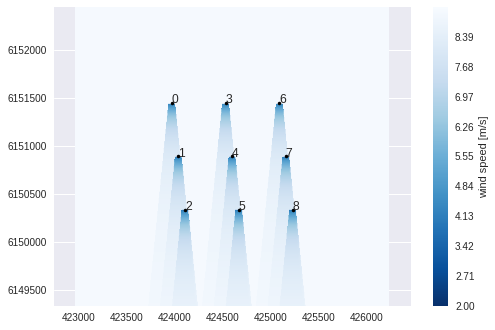

In [0]:
import numpy as np
from py_wake.aep._aep import AEP
from py_wake.examples.data.hornsrev1 import wt_x, wt_y, HornsrevV80,\
    HornsrevSite
from py_wake.wake_models.noj import NOJ
from py_wake.wake_models.fuga import FugaWakeModel


import matplotlib.pyplot as plt
wt_x = np.array(wt_x)[[0,1,2,8,9,10,16,17,18]]
wt_y = np.array(wt_y)[[0,1,2,8,9,10,16,17,18]]

from py_wake.tests.test_files import tfp
path = tfp + 'fuga/2MW/Z0=0.03000000Zi=00401Zeta0=0.00E+0/'
wake_model = FugaWakeModel(path, windTurbines)

wake_model=

wt = HornsrevV80()
aep = AEP(HornsrevSite(), wt, NOJ(wt))

print('AEP [GWh]', aep.calculate_AEP(wt_x, wt_y)[0].sum())
x_j = np.linspace(min(wt_x)-1000, max(wt_x)+1000, 500)
y_j = np.linspace(min(wt_y)-1000, max(wt_y)+1000, 300)

X, Y, Z = aep.wake_map(x_j, y_j, 70, wt_x, wt_y, wd=[0], ws=[9])
c = plt.contourf(X, Y, Z, np.arange(2, 9.1, .01), cmap='Blues_r')
plt.colorbar(c, label='wind speed [m/s]')

plt.plot(wt_x, wt_y, '.k')
for i, (x_, y_) in enumerate(zip(wt_x, wt_y)):
    plt.annotate(i, (x_, y_))
plt.axis('equal')
plt.show()

py_wake.aep._aep.AEP